<a href="https://colab.research.google.com/github/venkateshchandle/ml/blob/main/%E2%80%9C1BM22CS325_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


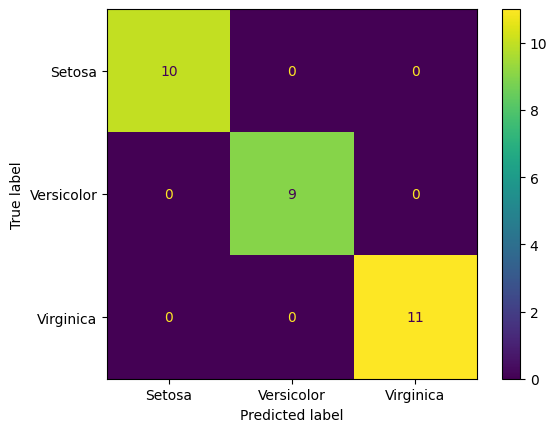

In [3]:
# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

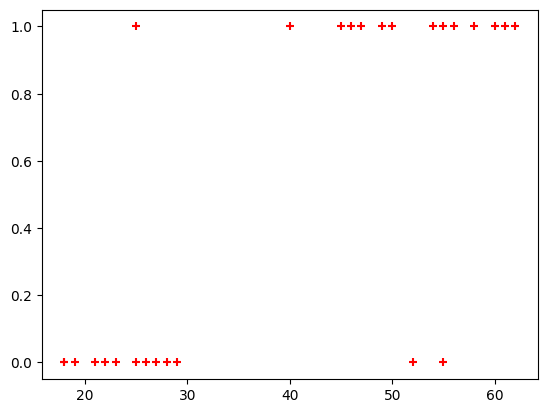

In [4]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

In [5]:
hr =  pd.read_csv("/content/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
print(hr.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None


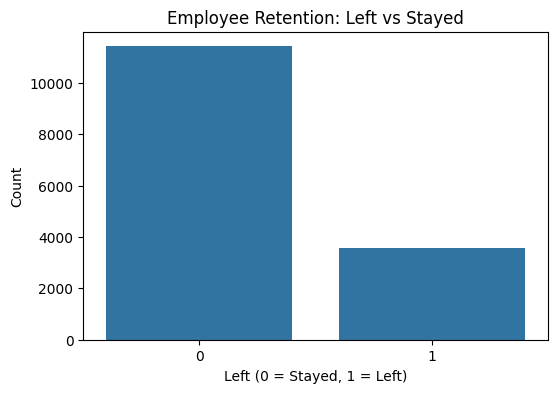

In [10]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=hr, x='left')
plt.title('Employee Retention: Left vs Stayed')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()

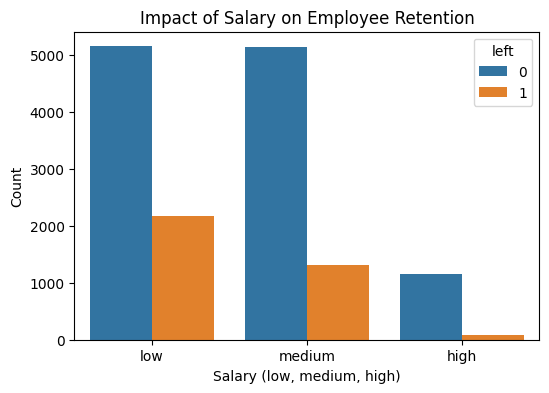

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=hr, x='salary', hue='left')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary (low, medium, high)')
plt.ylabel('Count')
plt.show()


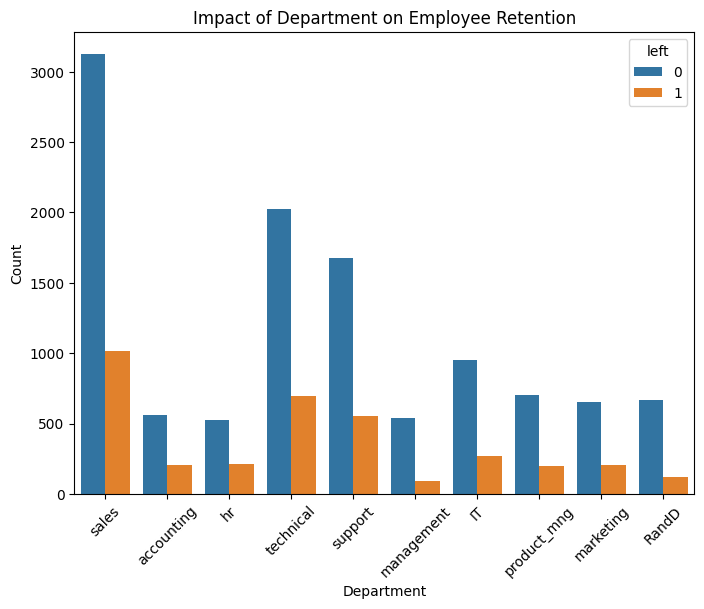

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=hr, x='Department', hue='left')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df=hr
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df['Department'] = LabelEncoder().fit_transform(df['Department'])

X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'salary', 'Department']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['salary']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['salary']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression Model: {accuracy:.4f}')
print("\nConfusion Matrix:")
# Call the confusion_matrix function from sklearn.metrics
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.7573

Confusion Matrix:
[[2102  192]
 [ 536  170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.47      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.63      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [36]:
zoo_df = pd.read_csv("/content/zoo-data.csv")
zoo_class_df = pd.read_csv("/content/zoo-class-type.csv")
zoo_df = zoo_df.drop(columns=["animal_name"])

In [37]:
X = zoo_df.drop(columns=["class_type"])
y = zoo_df["class_type"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model for multiclass classification
model = LogisticRegression(solver="lbfgs", max_iter=500)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 1.0000


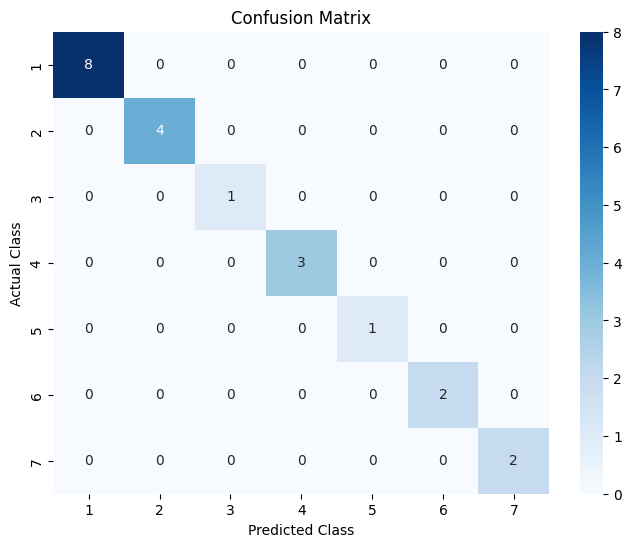

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()